## Objective - Create Simple Neural Network

#### import modules and prepare data

In [2]:
# Import sklearn/tensorflow modules.
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create simple dataset.
X_train = np.arange(-2, 10, dtype=float)
y_train = ((X_train * 2) - 1).astype(float)

# The rule is y = 2x - 1

print(X_train, X_train.dtype)
print(y_train, y_train.dtype)

[-2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] float64
[-5. -3. -1.  1.  3.  5.  7.  9. 11. 13. 15. 17.] float64


#### Create model

In [31]:
def model():
    model = Sequential()
    model.add(Dense(units=1, input_shape=[1]))
    model.compile(optimizer='sgd', loss='mean_squared_error')
    return model

model = model()

model.fit(X_train, y_train, epochs=150, verbose=False)    # NOTE: epochs are increased because of limited data.

print('Loss: {:.2f}'.format(model.evaluate(X_train, y_train, verbose=False)))

Loss: 0.04


#### Test model

In [32]:
def test():
    for i in range(4):
        random_num = np.random.randint(-4, 20)
        pred = model.predict([random_num])[0][0]

        if round(pred) == random_num * 2 - 1:
            output = '✔️'
        else:
            output = '❌'

        print(np.array([random_num, round(pred)]), output)

test()

[ 0 -1] ✔️
[14 27] ✔️
[4 7] ✔️
[18 35] ✔️


#### Plot the results

[1.9596108] [-0.72669345]


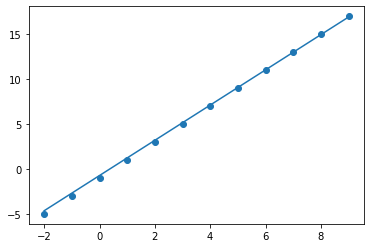

In [33]:
slope = model.get_weights()[0][0]
intercept = model.get_weights()[1]

plt.plot(X_train, X_train * slope + intercept)
plt.scatter(X_train, y_train)
print(slope, intercept)
